Course Name: Deep Learning

Lab Title: Time Series Forecasting using LSTM

Student Name: Surabhi Kharkate

PRN: 202201040215

Date of Submission: 14-04-2025

Group Members:  
Sakshi Lade (202201040218)  
Palak Yerawar (202201040195)  

Objective :

To forecast future values of a univariate time series using LSTM-based models.

To generate next characters/words based on a given input sequence using LSTM.

To classify text sequences using LSTM-based models (e.g., sentiment or spam detection).

# Experiment 5.1:
### **Objective:**
### **To forecast future values of a univariate time series using LSTM-based models.**

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 12s 138ms/step - loss: 0.0113
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 108ms/step - loss: 2.2643e-04
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 98ms/step - loss: 2.2205e-04
Epoch 4/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - loss: 2.2395e-04
Epoch 5/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - loss: 1.9145e-04
Epoch 6/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 90ms/step - loss: 1.9054e-04
Epoch 7/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step - loss: 1.8859e-04
Epoch 8/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 11s 107ms/step - loss: 1.7528e-04
Epoch 9/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 11s 119ms/step - loss: 1.9383e-04
Epoch 10/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 1.6823e-04
Epoch 11/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 90ms/step - loss: 1.7544e-04
Epoch 12/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - loss: 1.8588e-04
Epoch 13/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 90ms/step - loss: 1.4819e-04
Epoch 14/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - loss: 1.5889e-04
Epoch 15/20
58/

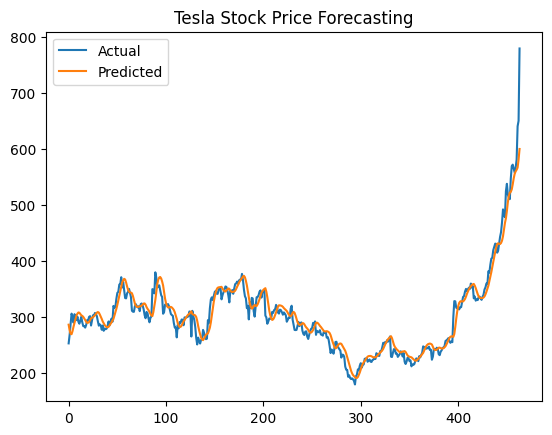

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load dataset
df = pd.read_csv("TSLA.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
data = df[['Close']].values

# Scale data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Sequence creation
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 100
X, y = create_sequences(scaled_data, seq_length)

# Train/test split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# LSTM model
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(seq_length, 1)),
    LSTM(50, return_sequences=False),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=20, batch_size=32)

# Prediction
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)
actual = scaler.inverse_transform(y_test)

rmse = np.sqrt(mean_squared_error(actual, predicted))
mae = mean_absolute_error(actual, predicted)

print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}")

# Plot
plt.plot(actual, label="Actual")
plt.plot(predicted, label="Predicted")
plt.legend()
plt.title("Tesla Stock Price Forecasting")
plt.show()


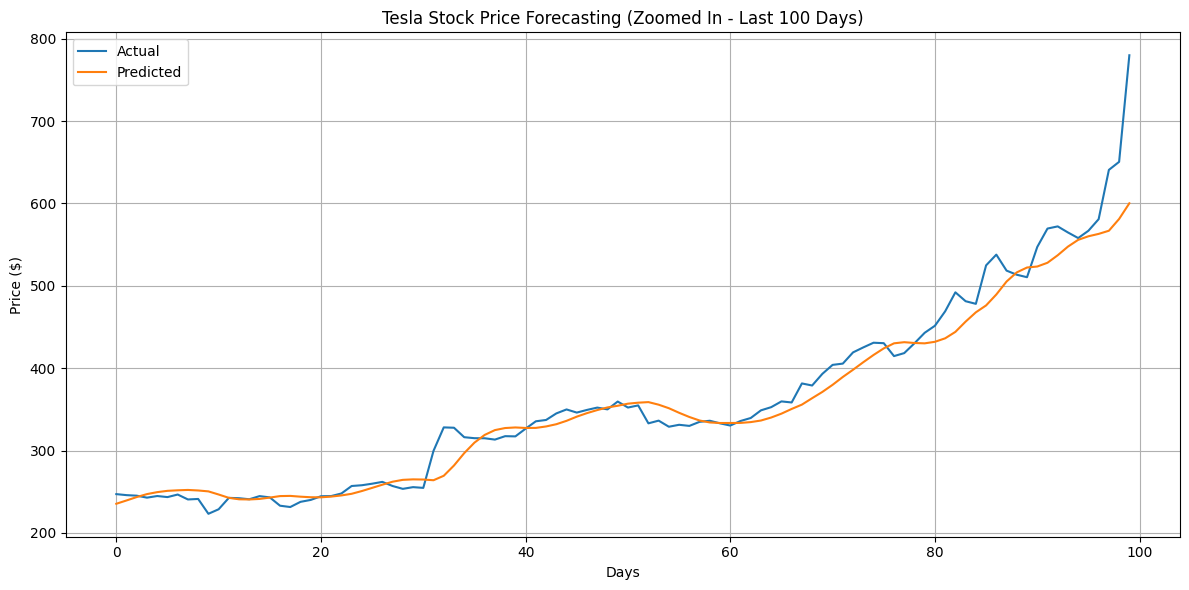

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(actual[-100:], label="Actual")
plt.plot(predicted[-100:], label="Predicted")
plt.legend()
plt.title("Tesla Stock Price Forecasting (Zoomed In - Last 100 Days)")
plt.xlabel("Days")
plt.ylabel("Price ($)")  # Or "Normalized Price" if scaled
plt.grid(True)
plt.tight_layout()
plt.show()


# Experiment 5.2:
### **Objective:**
### **To generate next characters/words based on a given input sequence using LSTM.**

### LSTM Text Generation using Lyrics Dataset

Step 1: Load and Prepare Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Load Lyrics Dataset
data = pd.read_csv('/content/LYRICS_DATASET.csv')

# Check columns and pick text
print(data.head())
print(data.columns)

# Assuming there's a 'lyrics' column — change if different
text = ' '.join(data['Lyrics'].dropna().astype(str).tolist()).lower()

# View a sample
print(text[:1000])


       Artist Name         Song Name  \
0  Phoebe Bridgers   Motion Sickness   
1  Phoebe Bridgers            Killer   
2  Phoebe Bridgers           Georgia   
3  Phoebe Bridgers             Kyoto   
4  Phoebe Bridgers  Would You Rather   

                                              Lyrics  
0   I hate you for what you did And I miss you li...  
1   Sometimes I think I'm a killer I scared you i...  
2   Georgia, Georgia, I love your son And when he...  
3   Day off in Kyoto Got bored at the temple Look...  
4   Playing "would you rather" When it comes to f...  
Index(['Artist Name', 'Song Name', 'Lyrics'], dtype='object')
 i hate you for what you did and i miss you like a little kid i faked it every time but that's alright i can hardly feel anything i hardly feel anything at all   you gave me fifteen hundred to see your hypnotherapist i only went one time you let it slide fell on hard times a year ago was hoping you would let it go, and you did   i have emotional motion sickness som

Step 2: Prepare Input-Output Sequences

In [ ]:
# Create character mapping
chars = sorted(list(set(text)))
char_to_int = {c: i for i, c in enumerate(chars)}
int_to_char = {i: c for i, c in enumerate(chars)}

# Convert entire text to integer sequence
encoded_text = [char_to_int[c] for c in text]

# Define sequence length
seq_length = 100
sequences = []
next_chars = []

for i in range(len(encoded_text) - seq_length):
    sequences.append(encoded_text[i:i+seq_length])
    next_chars.append(encoded_text[i+seq_length])

print("Total sequences: ", len(sequences))


Total sequences:  430894


Step 3: Prepare Training Data

In [ ]:
# Convert to numpy arrays
X = np.array(sequences)
y = to_categorical(next_chars, num_classes=len(chars))




Step 4: Build LSTM Model

In [ ]:
from keras.layers import Input

model = Sequential()
model.add(Embedding(len(chars), 50, input_length=seq_length))
model.add(LSTM(256, return_sequences=False))
model.add(Dense(len(chars), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Step 5: Train the Model

In [ ]:
history = model.fit(X, y, epochs=10, batch_size=64)


Epoch 1/10
6733/6733 ━━━━━━━━━━━━━━━━━━━━ 77s 11ms/step - accuracy: 0.3919 - loss: 2.1221
Epoch 2/10
6733/6733 ━━━━━━━━━━━━━━━━━━━━ 79s 11ms/step - accuracy: 0.5471 - loss: 1.4985
Epoch 3/10
6733/6733 ━━━━━━━━━━━━━━━━━━━━ 80s 10ms/step - accuracy: 0.5875 - loss: 1.3512
Epoch 4/10
6733/6733 ━━━━━━━━━━━━━━━━━━━━ 85s 11ms/step - accuracy: 0.6130 - loss: 1.2671
Epoch 5/10
6733/6733 ━━━━━━━━━━━━━━━━━━━━ 80s 10ms/step - accuracy: 0.6313 - loss: 1.2049
Epoch 6/10
6733/6733 ━━━━━━━━━━━━━━━━━━━━ 82s 10ms/step - accuracy: 0.6452 - loss: 1.1538
Epoch 7/10
6733/6733 ━━━━━━━━━━━━━━━━━━━━ 85s 11ms/step - accuracy: 0.6603 - loss: 1.1083
Epoch 8/10
6733/6733 ━━━━━━━━━━━━━━━━━━━━ 83s 11ms/step - accuracy: 0.6698 - loss: 1.0724
Epoch 9/10
6733/6733 ━━━━━━━━━━━━━━━━━━━━ 72s 11ms/step - accuracy: 0.6782 - loss: 1.0488
Epoch 10/10
6733/6733 ━━━━━━━━━━━━━━━━━━━━ 73s 11ms/step - accuracy: 0.6870 - loss: 1.0209


Step 6: Plot Accuracy & Loss

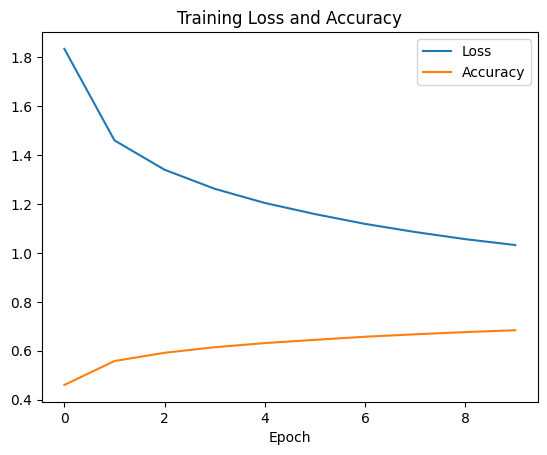

In [ ]:
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['accuracy'], label='Accuracy')
plt.title('Training Loss and Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()


Step 7: Generate Text Samples



In [ ]:
import random

def generate_text(seed_text, gen_length=500):
    result = seed_text
    pattern = [char_to_int[c] for c in seed_text.lower()]

    for i in range(gen_length):
        x = np.array([pattern[-seq_length:]])
        prediction = model.predict(x, verbose=0)
        index = np.argmax(prediction)
        result += int_to_char[index]
        pattern.append(index)

    return result

# Try generating lyrics!
seed_text = text[100:100+seq_length]
print("Seed Text:\n", seed_text)
print("\nGenerated Lyrics:\n")
print(generate_text(seed_text))


Seed Text:
 ht i can hardly feel anything i hardly feel anything at all   you gave me fifteen hundred to see you

Generated Lyrics:

ht i can hardly feel anything i hardly feel anything at all   you gave me fifteen hundred to see you can watch me for your heart and the back of my face and i don't wanna know about your back in the cold on my face and i don't wanna know that i want to be and it's not the water of a cones but i will be found   i want to be alone to be alone to be alone to be alone to be alone to be alone to be alone to be alone to be alone to be alone to be alone to be alone to be alone to be alone to be alone to be alone to be alone to be alone to be alone to be alone to be alone to be alone to be alone to be


# Experiment 5.3:
### **Objective:**
### **To classify text sequences using LSTM-based models (e.g., sentiment or spam detection).**

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


140/140 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - accuracy: 0.8497 - loss: 0.4645 - val_accuracy: 0.8655 - val_loss: 0.4003
Epoch 2/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - accuracy: 0.8632 - loss: 0.4141 - val_accuracy: 0.8655 - val_loss: 0.3967
Epoch 3/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - accuracy: 0.8658 - loss: 0.4005 - val_accuracy: 0.8655 - val_loss: 0.3971
Epoch 4/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - accuracy: 0.8771 - loss: 0.3765 - val_accuracy: 0.8655 - val_loss: 0.3974
Epoch 5/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - accuracy: 0.8589 - loss: 0.4113 - val_accuracy: 0.8655 - val_loss: 0.3988
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
              precision    recall  f1-score   support

         ham       0.87      1.00      0.93       965
        spam       0.00      0.00      0.00       150

    accuracy                           0.87      1115
   macro avg       0.43      0.50      0.46      1115
weighted avg       0.75      0.87      0.80      1115


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


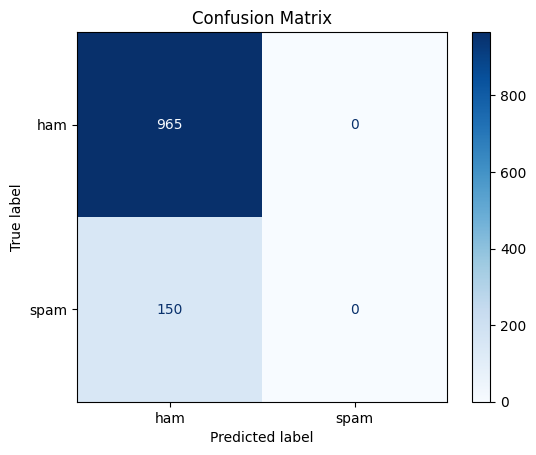

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load your dataset (replace with your actual path)
df = pd.read_csv("spam.csv", encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'text']

# Label encoding: ham=0, spam=1
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

# Tokenization
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding sequences
max_len = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# LSTM Model
model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=max_len),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training
history = model.fit(X_train_pad, y_train, epochs=5, validation_data=(X_test_pad, y_test), verbose=1)

# Evaluation
y_pred = (model.predict(X_test_pad) > 0.5).astype("int32")

# Classification report
print(classification_report(y_test, y_pred, target_names=['ham', 'spam']))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['ham', 'spam'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


###Declaration

I, Surabhi Kharkate , confirm that the work submitted in this assignment is my own and has been completed following academic integrity guidelines. The code is uploaded on my GitHub repository account, and the repository link is provided below:

GitHub Repository Link: https://github.com/surabhik26/Time-Series-Forecasting-using-LSTM

Signature: Surabhi Kharkate

